In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_table('Mu_n_majtrain.dat' ,sep = ' ')
df_test = pd.read_table('Mu_n_majtest.dat' ,sep = ' ')

In [3]:
X_train,y_train = df_train.drop('Mu' , axis= 1 ) , df_train['Mu']
X_test,y_test = df_test.drop('Mu' , axis= 1 ) , df_test['Mu']

In [4]:
def objective(trial):
    # Пространство поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])  # Убрали 'auto'

    # Создание модели с текущими гиперпараметрами
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Оценка модели с помощью кросс-валидации
    score = cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error', error_score='raise')

    return -score.mean()  # Optuna минимизирует значение, поэтому берем отрицательное MSE

# Создание исследования и запуск оптимизации
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

# Вывод лучших гиперпараметров
print("Best hyperparameters: ", study.best_params)

best_rf = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=42
)

[I 2024-11-26 20:01:07,630] A new study created in memory with name: no-name-bd353476-1169-481c-9a31-5d2252152b49
[I 2024-11-26 20:01:08,392] Trial 0 finished with value: 525095.5773840742 and parameters: {'n_estimators': 262, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 525095.5773840742.
[I 2024-11-26 20:01:09,011] Trial 1 finished with value: 1095565.3654805562 and parameters: {'n_estimators': 256, 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 525095.5773840742.
[I 2024-11-26 20:01:09,152] Trial 2 finished with value: 1795350.7239075943 and parameters: {'n_estimators': 59, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 0 with value: 525095.5773840742.
[I 2024-11-26 20:01:09,717] Trial 3 finished with value: 1913417.3217493512 and parameters: {'n_estimators': 254, 'max_depth': 21, 'min_s

[I 2024-11-26 20:01:21,725] Trial 33 finished with value: 636621.1051166888 and parameters: {'n_estimators': 162, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 14 with value: 342406.1414412186.
[I 2024-11-26 20:01:21,933] Trial 34 finished with value: 495324.9276303335 and parameters: {'n_estimators': 65, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 14 with value: 342406.1414412186.
[I 2024-11-26 20:01:22,098] Trial 35 finished with value: 758757.0286419851 and parameters: {'n_estimators': 52, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 14 with value: 342406.1414412186.
[I 2024-11-26 20:01:22,525] Trial 36 finished with value: 491530.0088516702 and parameters: {'n_estimators': 68, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 342406.1414412186.

[I 2024-11-26 20:01:31,308] Trial 66 finished with value: 664154.7200274171 and parameters: {'n_estimators': 77, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:31,555] Trial 67 finished with value: 324885.8509844414 and parameters: {'n_estimators': 65, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:31,784] Trial 68 finished with value: 485342.90074979916 and parameters: {'n_estimators': 69, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:32,038] Trial 69 finished with value: 2059766.7581374068 and parameters: {'n_estimators': 105, 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210

[I 2024-11-26 20:01:43,400] Trial 99 finished with value: 958093.1478745133 and parameters: {'n_estimators': 64, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:43,655] Trial 100 finished with value: 495203.3047201691 and parameters: {'n_estimators': 80, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:44,012] Trial 101 finished with value: 331445.3748894823 and parameters: {'n_estimators': 99, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:44,417] Trial 102 finished with value: 322356.89696266904 and parameters: {'n_estimators': 112, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.372721

[I 2024-11-26 20:01:51,326] Trial 132 finished with value: 322149.053663411 and parameters: {'n_estimators': 75, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:51,572] Trial 133 finished with value: 319737.628725639 and parameters: {'n_estimators': 72, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:51,761] Trial 134 finished with value: 490495.43414576544 and parameters: {'n_estimators': 60, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:51,987] Trial 135 finished with value: 1434396.3837207686 and parameters: {'n_estimators': 88, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 45 with value: 306821.37272109

[I 2024-11-26 20:01:58,881] Trial 165 finished with value: 389112.543163498 and parameters: {'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:59,080] Trial 166 finished with value: 485141.7129873277 and parameters: {'n_estimators': 60, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:59,326] Trial 167 finished with value: 329660.6843507256 and parameters: {'n_estimators': 66, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:01:59,508] Trial 168 finished with value: 663260.6503216577 and parameters: {'n_estimators': 58, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.37272109

[I 2024-11-26 20:02:08,700] Trial 198 finished with value: 513289.7046751177 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:08,935] Trial 199 finished with value: 394601.0839508949 and parameters: {'n_estimators': 66, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:09,147] Trial 200 finished with value: 492678.34136149596 and parameters: {'n_estimators': 59, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:09,375] Trial 201 finished with value: 318976.563916261 and parameters: {'n_estimators': 59, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.37272109

[I 2024-11-26 20:02:16,952] Trial 231 finished with value: 321758.5681960232 and parameters: {'n_estimators': 72, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:17,162] Trial 232 finished with value: 324798.28246246924 and parameters: {'n_estimators': 54, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:17,505] Trial 233 finished with value: 313948.7830184158 and parameters: {'n_estimators': 70, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:17,814] Trial 234 finished with value: 401831.63203854294 and parameters: {'n_estimators': 80, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.372721

[I 2024-11-26 20:02:26,360] Trial 264 finished with value: 395504.34296608367 and parameters: {'n_estimators': 84, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:26,662] Trial 265 finished with value: 313381.6760097198 and parameters: {'n_estimators': 77, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:26,999] Trial 266 finished with value: 341746.2544668279 and parameters: {'n_estimators': 89, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:27,259] Trial 267 finished with value: 484407.5018236464 and parameters: {'n_estimators': 78, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210

[I 2024-11-26 20:02:36,652] Trial 297 finished with value: 695690.5121090853 and parameters: {'n_estimators': 181, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:37,278] Trial 298 finished with value: 433674.77027679863 and parameters: {'n_estimators': 201, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:37,719] Trial 299 finished with value: 1409379.1255811646 and parameters: {'n_estimators': 80, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:38,135] Trial 300 finished with value: 403247.14604763227 and parameters: {'n_estimators': 89, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3

[I 2024-11-26 20:02:46,902] Trial 330 finished with value: 318900.7915970628 and parameters: {'n_estimators': 67, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:47,159] Trial 331 finished with value: 491686.58690141066 and parameters: {'n_estimators': 75, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:47,472] Trial 332 finished with value: 325935.8019274223 and parameters: {'n_estimators': 82, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:47,701] Trial 333 finished with value: 546013.5529446903 and parameters: {'n_estimators': 72, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210

[I 2024-11-26 20:02:56,058] Trial 363 finished with value: 1924656.4293938999 and parameters: {'n_estimators': 237, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:56,386] Trial 364 finished with value: 483818.61540836986 and parameters: {'n_estimators': 102, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:56,681] Trial 365 finished with value: 312149.73000741936 and parameters: {'n_estimators': 78, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:02:56,945] Trial 366 finished with value: 585500.3800766497 and parameters: {'n_estimators': 85, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.37

[I 2024-11-26 20:03:07,105] Trial 396 finished with value: 625745.6024909507 and parameters: {'n_estimators': 81, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:08,713] Trial 397 finished with value: 450764.75460031483 and parameters: {'n_estimators': 269, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:09,151] Trial 398 finished with value: 489728.9697394828 and parameters: {'n_estimators': 62, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:09,599] Trial 399 finished with value: 314638.82233886886 and parameters: {'n_estimators': 76, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.372721

[I 2024-11-26 20:03:19,807] Trial 429 finished with value: 552516.0977584481 and parameters: {'n_estimators': 69, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:20,103] Trial 430 finished with value: 395273.62274537096 and parameters: {'n_estimators': 82, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:20,361] Trial 431 finished with value: 491686.58690141066 and parameters: {'n_estimators': 75, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:20,578] Trial 432 finished with value: 665960.5916337741 and parameters: {'n_estimators': 66, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.37272

[I 2024-11-26 20:03:28,351] Trial 462 finished with value: 392836.0024987149 and parameters: {'n_estimators': 85, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:28,586] Trial 463 finished with value: 546013.5529446903 and parameters: {'n_estimators': 72, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:28,882] Trial 464 finished with value: 495897.78576788935 and parameters: {'n_estimators': 89, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:29,121] Trial 465 finished with value: 315297.9980108777 and parameters: {'n_estimators': 60, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210

[I 2024-11-26 20:03:38,910] Trial 495 finished with value: 331808.9123792573 and parameters: {'n_estimators': 80, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:39,109] Trial 496 finished with value: 1915540.9741739396 and parameters: {'n_estimators': 73, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 18, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:39,367] Trial 497 finished with value: 324898.9018808465 and parameters: {'n_estimators': 65, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 306821.3727210935.
[I 2024-11-26 20:03:39,627] Trial 498 finished with value: 484440.6742281681 and parameters: {'n_estimators': 77, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 306821.372721

Best hyperparameters:  {'n_estimators': 52, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [6]:
best_rf.fit(X_train,y_train)
otuna_pred = best_rf.predict(X_test)


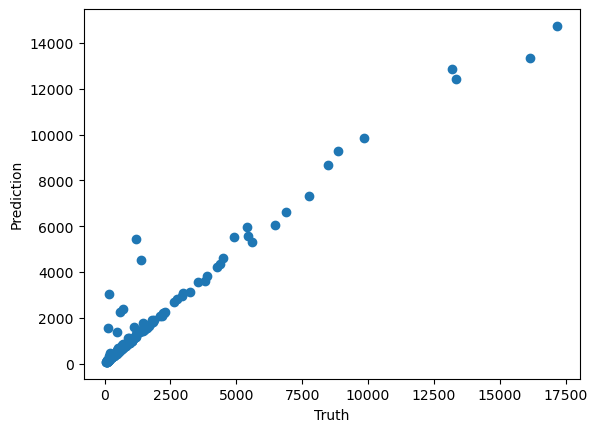

In [7]:
plt.scatter(y_test, otuna_pred)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()